In [1]:
import warnings
import pandas as pd
import sys
import os
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path+"\\python")
from plot import *

# hide warnings
warnings.filterwarnings("ignore")

# show all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

#### Load listings data set and hold specific columns

In [2]:
from IPython.display import display

# columns that we need
columns = [ "listing_id", "date", "price" ]

# load the data set
calendar = pd.read_csv("../data_sets/calendar.csv", usecols = columns)

# display the data set
display(calendar.shape, calendar.head(5))

(4159030, 3)

,listing_id,date,price
0,138386,2020-05-18,$55.00
1,10595,2020-05-18,$60.00
2,10595,2020-05-19,$60.00
3,10595,2020-05-20,$60.00
4,10595,2020-05-21,$60.00


#### Drop all rows that have any nan value

In [3]:
# drop rows
calendar = calendar.dropna()

# display the data set
display(calendar.shape, calendar.head(5))

(4150800, 3)

,listing_id,date,price
0,138386,2020-05-18,$55.00
1,10595,2020-05-18,$60.00
2,10595,2020-05-19,$60.00
3,10595,2020-05-20,$60.00
4,10595,2020-05-21,$60.00


#### Clean data

In [4]:
# extract prices from the table
price = calendar["price"]
prices=[]
# clean the price and convert it to float
for p in price:
    get_price = p[1:]                     # remove '$'
    get_price = get_price.replace(",","") # remove ','
    prices.append(float(get_price))       # string to float
# replace the price column with the new float prices column
calendar["price"] = prices

# separate the date column to year, month, day
calendar["year"], calendar["month"], calendar["day"] = calendar["date"].str.split("-",2).str

# display the data set
display(calendar.shape, calendar.head(5))

(4150800, 6)

,listing_id,date,price,year,month,day
0,138386,2020-05-18,55.0,2020,05,18
1,10595,2020-05-18,60.0,2020,05,18
2,10595,2020-05-19,60.0,2020,05,19
3,10595,2020-05-20,60.0,2020,05,20
4,10595,2020-05-21,60.0,2020,05,21


#### Average Monthly Price per Year

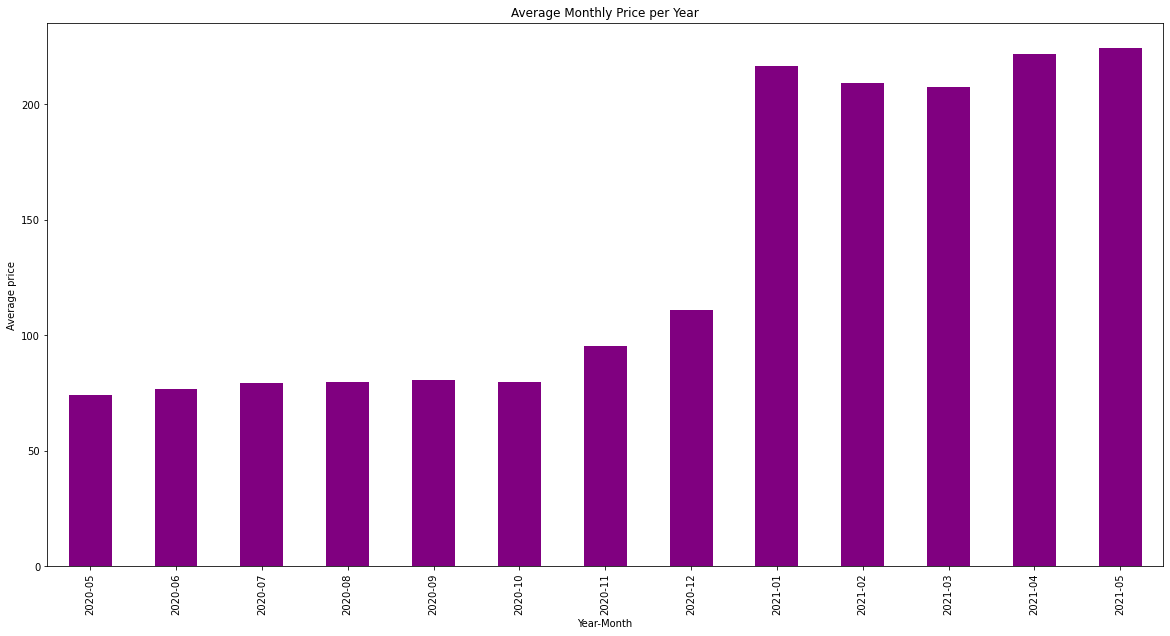

In [5]:
# group by month and year and calculate mean price
month_per_year = calendar.groupby(["year", "month"]).price.mean()
month_per_year = month_per_year.reset_index()
month_per_year = month_per_year.rename(columns={"price":"avg_price"})
month_per_year["year-month"] = month_per_year["year"] + "-" + month_per_year["month"]
#display(month_per_year)

plot_bar(month_per_year,"year-month","avg_price","Average Monthly Price per Year",
         "Year-Month","Average price","purple")